## Creating the Image embeddings for all the images and creating the new column "Image Embeddings" and appends the each embedding with the respective Data row.

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os
import tensorflow as tf

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv(r'C:\Users\nishi\OneDrive\Desktop\mentions\Fashion Dataset.csv')

### EDA:

In [3]:
price_range = [0, 500]+list(range(1000, 13000, 3000))+list(range(15000, 55000, 5000))
df['price'] = pd.cut(df['price'], bins=price_range, include_lowest=True, labels=['0-500', '500-1K', '1K-4K', '4K-7K', '7K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K', '35K-40K', '40K-45K', '45K-50K'])

<Axes: xlabel='price'>

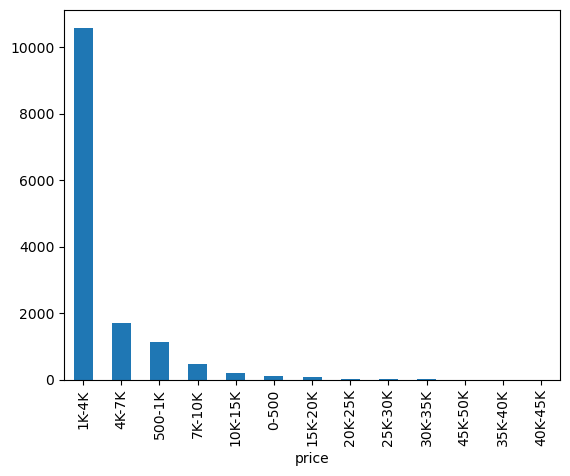

In [4]:
df['price'].value_counts().plot(kind = 'bar')

#### Top 50 Brands by Number of products

<Axes: title={'center': 'Top 50 Brands by number of products'}, xlabel='brand'>

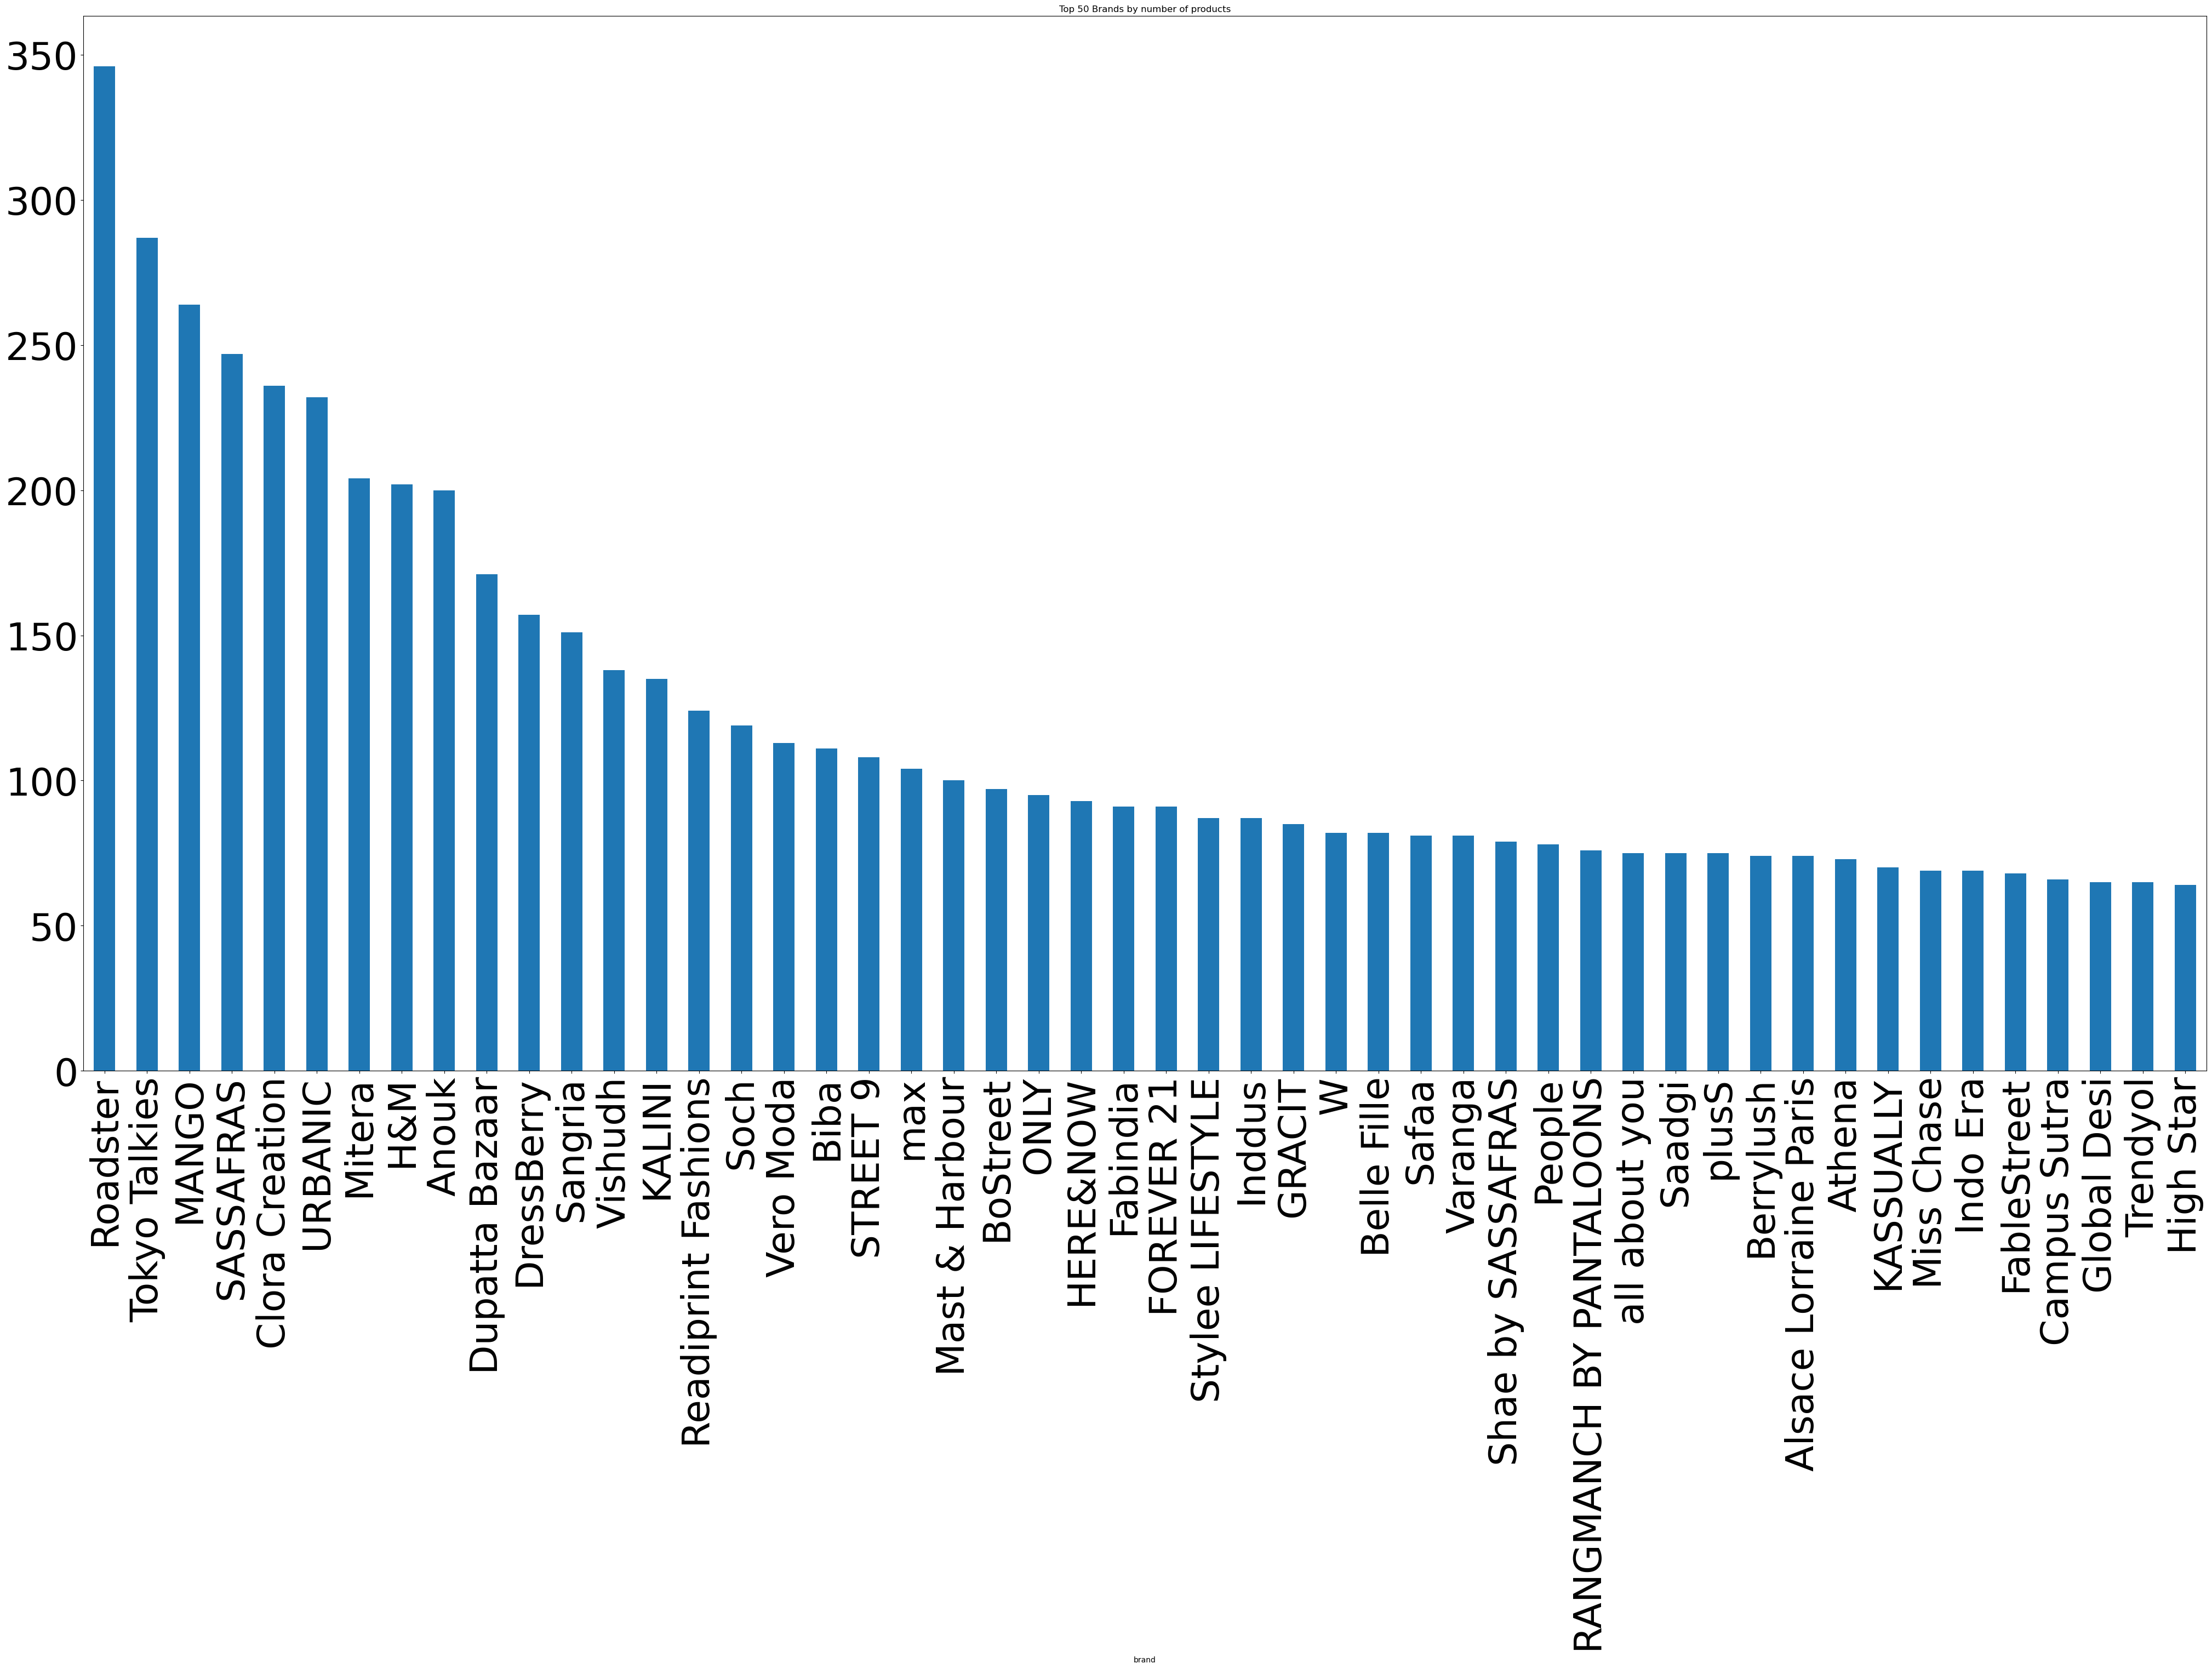

In [19]:
df['brand'].value_counts()[:50].plot(kind = 'bar', figsize = (50,25), fontsize = 50)

### Applying the VGG16 pre-trained model to Create the Image Embedding

In [3]:
base_model = VGG16(weights = 'imagenet')
model = Model(inputs = base_model.input, outputs = base_model.get_layer('fc2').output)

### The get_features() function takes the images and converts it to array and preprocess the image to give it in VGG16 Model to create the embedding of images.

In [4]:
def get_features(img_path):
    try:
        img = image.load_img(img_path, target_size = (224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis = 0)
        img_array = preprocess_input(img_array)
        features = model.predict(img_array)

    except Exception as e:
        print(e)
        return None
    return features.flatten()

In [5]:
df = df.dropna(how = "all")

In [6]:
duplicated_rows = df[df.duplicated(subset="p_id", keep=False)]
rows_to_delete = duplicated_rows.drop_duplicates(subset="p_id", keep="first")
df = df.drop(index = rows_to_delete.index)

In [7]:
df = df.dropna(subset = ['p_id'])

### Giving the images one by one to get_features() function to create the embedding and then creating a new column 'img_embedding' to store the embedding created by model and then this will store in a .json file

In [8]:
path = r'C:\Users\nishi\OneDrive\Desktop\CP-01\archive\images'
embeddings = []
for idx,i in enumerate(df['p_id']):
    img_path = path + f'/{int(i)}.jpg'
    img_embedding = get_features(img_path)
    embeddings.append(img_embedding)
    print(idx)

df['img_embedding'] = embeddings
# df.to_csv('Dataset_with_img_embeddings.csv')
df.to_json('Dataset_with_img_embeddings.json')

1/1 [==============================] - 0s 415ms/step
0
1/1 [==============================] - 0s 184ms/step
1
1/1 [==============================] - 0s 187ms/step
2
1/1 [==============================] - 0s 185ms/step
3
1/1 [==============================] - 0s 177ms/step
4
1/1 [==============================] - 0s 183ms/step
5
1/1 [==============================] - 0s 182ms/step
6
1/1 [==============================] - 0s 184ms/step
7
1/1 [==============================] - 0s 190ms/step
8
1/1 [==============================] - 0s 168ms/step
9
1/1 [==============================] - 0s 184ms/step
10
1/1 [==============================] - 0s 174ms/step
11
1/1 [==============================] - 0s 184ms/step
12
1/1 [==============================] - 0s 184ms/step
13
1/1 [==============================] - 0s 175ms/step
14
1/1 [==============================] - 0s 186ms/step
15
1/1 [==============================] - 0s 186ms/step
16
1/1 [==============================] - 0s 173ms/step
17
1/

1/1 [==============================] - 0s 187ms/step
288
1/1 [==============================] - 0s 194ms/step
289
1/1 [==============================] - 0s 184ms/step
290
1/1 [==============================] - 0s 199ms/step
291
1/1 [==============================] - 0s 181ms/step
292
1/1 [==============================] - 0s 185ms/step
293
1/1 [==============================] - 0s 183ms/step
294
1/1 [==============================] - 0s 183ms/step
295
1/1 [==============================] - 0s 188ms/step
296
1/1 [==============================] - 0s 182ms/step
297
1/1 [==============================] - 0s 182ms/step
298
1/1 [==============================] - 0s 167ms/step
299
1/1 [==============================] - 0s 184ms/step
300
1/1 [==============================] - 0s 186ms/step
301
1/1 [==============================] - 0s 167ms/step
302
1/1 [==============================] - 0s 186ms/step
303
1/1 [==============================] - 0s 187ms/step
304
1/1 [==========================

1/1 [==============================] - 0s 192ms/step
574
1/1 [==============================] - 0s 184ms/step
575
1/1 [==============================] - 0s 183ms/step
576
1/1 [==============================] - 0s 199ms/step
577
1/1 [==============================] - 0s 188ms/step
578
1/1 [==============================] - 0s 183ms/step
579
1/1 [==============================] - 0s 200ms/step
580
1/1 [==============================] - 0s 201ms/step
581
1/1 [==============================] - 0s 204ms/step
582
1/1 [==============================] - 0s 188ms/step
583
1/1 [==============================] - 0s 194ms/step
584
1/1 [==============================] - 0s 184ms/step
585
1/1 [==============================] - 0s 191ms/step
586
1/1 [==============================] - 0s 201ms/step
587
1/1 [==============================] - 0s 206ms/step
588
1/1 [==============================] - 0s 183ms/step
589
1/1 [==============================] - 0s 182ms/step
590
1/1 [==========================

1/1 [==============================] - 0s 266ms/step
860
1/1 [==============================] - 0s 255ms/step
861
1/1 [==============================] - 0s 282ms/step
862
1/1 [==============================] - 0s 283ms/step
863
1/1 [==============================] - 0s 283ms/step
864
1/1 [==============================] - 0s 251ms/step
865
1/1 [==============================] - 0s 283ms/step
866
1/1 [==============================] - 0s 267ms/step
867
1/1 [==============================] - 0s 283ms/step
868
1/1 [==============================] - 0s 283ms/step
869
1/1 [==============================] - 0s 298ms/step
870
1/1 [==============================] - 0s 314ms/step
871
1/1 [==============================] - 0s 267ms/step
872
1/1 [==============================] - 0s 266ms/step
873
1/1 [==============================] - 0s 251ms/step
874
1/1 [==============================] - 0s 251ms/step
875
1/1 [==============================] - 0s 314ms/step
876
1/1 [==========================

1/1 [==============================] - 0s 188ms/step
1144
1/1 [==============================] - 0s 188ms/step
1145
1/1 [==============================] - 0s 188ms/step
1146
1/1 [==============================] - 0s 188ms/step
1147
1/1 [==============================] - 0s 190ms/step
1148
1/1 [==============================] - 0s 204ms/step
1149
1/1 [==============================] - 0s 203ms/step
1150
1/1 [==============================] - 0s 203ms/step
1151
1/1 [==============================] - 0s 204ms/step
1152
1/1 [==============================] - 0s 220ms/step
1153
1/1 [==============================] - 0s 204ms/step
1154
1/1 [==============================] - 0s 188ms/step
1155
1/1 [==============================] - 0s 204ms/step
1156
1/1 [==============================] - 0s 204ms/step
1157
1/1 [==============================] - 0s 188ms/step
1158
1/1 [==============================] - 0s 204ms/step
1159
1/1 [==============================] - 0s 236ms/step
1160
1/1 [=========

1/1 [==============================] - 0s 216ms/step
1425
1/1 [==============================] - 0s 201ms/step
1426
1/1 [==============================] - 0s 200ms/step
1427
1/1 [==============================] - 0s 199ms/step
1428
1/1 [==============================] - 0s 200ms/step
1429
1/1 [==============================] - 0s 214ms/step
1430
1/1 [==============================] - 0s 194ms/step
1431
1/1 [==============================] - 0s 214ms/step
1432
1/1 [==============================] - 0s 215ms/step
1433
1/1 [==============================] - 0s 215ms/step
1434
1/1 [==============================] - 0s 199ms/step
1435
1/1 [==============================] - 0s 214ms/step
1436
1/1 [==============================] - 0s 214ms/step
1437
1/1 [==============================] - 0s 215ms/step
1438
1/1 [==============================] - 0s 214ms/step
1439
1/1 [==============================] - 0s 215ms/step
1440
1/1 [==============================] - 0s 199ms/step
1441
1/1 [=========

1/1 [==============================] - 0s 254ms/step
1707
1/1 [==============================] - 0s 215ms/step
1708
1/1 [==============================] - 0s 215ms/step
1709
1/1 [==============================] - 0s 216ms/step
1710
1/1 [==============================] - 0s 216ms/step
1711
1/1 [==============================] - 0s 229ms/step
1712
1/1 [==============================] - 0s 215ms/step
1713
1/1 [==============================] - 0s 230ms/step
1714
1/1 [==============================] - 0s 218ms/step
1715
1/1 [==============================] - 0s 214ms/step
1716
1/1 [==============================] - 0s 216ms/step
1717
1/1 [==============================] - 0s 216ms/step
1718
1/1 [==============================] - 0s 212ms/step
1719
1/1 [==============================] - 0s 217ms/step
1720
1/1 [==============================] - 0s 201ms/step
1721
1/1 [==============================] - 0s 200ms/step
1722
1/1 [==============================] - 0s 209ms/step
1723
1/1 [=========

1/1 [==============================] - 0s 202ms/step
1989
1/1 [==============================] - 0s 198ms/step
1990
1/1 [==============================] - 0s 200ms/step
1991
1/1 [==============================] - 0s 201ms/step
1992
1/1 [==============================] - 0s 215ms/step
1993
1/1 [==============================] - 0s 216ms/step
1994
1/1 [==============================] - 0s 214ms/step
1995
1/1 [==============================] - 0s 215ms/step
1996
1/1 [==============================] - 0s 217ms/step
1997
1/1 [==============================] - 0s 216ms/step
1998
1/1 [==============================] - 0s 200ms/step
1999
1/1 [==============================] - 0s 215ms/step
2000
1/1 [==============================] - 0s 200ms/step
2001
1/1 [==============================] - 0s 216ms/step
2002
1/1 [==============================] - 0s 214ms/step
2003
1/1 [==============================] - 0s 215ms/step
2004
1/1 [==============================] - 0s 199ms/step
2005
1/1 [=========

1/1 [==============================] - 0s 210ms/step
2271
1/1 [==============================] - 0s 214ms/step
2272
1/1 [==============================] - 0s 215ms/step
2273
1/1 [==============================] - 0s 215ms/step
2274
1/1 [==============================] - 0s 215ms/step
2275
1/1 [==============================] - 0s 199ms/step
2276
1/1 [==============================] - 0s 215ms/step
2277
1/1 [==============================] - 0s 216ms/step
2278
1/1 [==============================] - 0s 202ms/step
2279
1/1 [==============================] - 0s 229ms/step
2280
1/1 [==============================] - 0s 215ms/step
2281
1/1 [==============================] - 0s 216ms/step
2282
1/1 [==============================] - 0s 215ms/step
2283
1/1 [==============================] - 0s 200ms/step
2284
1/1 [==============================] - 0s 215ms/step
2285
1/1 [==============================] - 0s 199ms/step
2286
1/1 [==============================] - 0s 214ms/step
2287
1/1 [=========

1/1 [==============================] - 0s 205ms/step
2553
1/1 [==============================] - 0s 233ms/step
2554
1/1 [==============================] - 0s 201ms/step
2555
1/1 [==============================] - 0s 215ms/step
2556
1/1 [==============================] - 0s 215ms/step
2557
1/1 [==============================] - 0s 215ms/step
2558
1/1 [==============================] - 0s 231ms/step
2559
1/1 [==============================] - 0s 201ms/step
2560
1/1 [==============================] - 0s 199ms/step
2561
1/1 [==============================] - 0s 231ms/step
2562
1/1 [==============================] - 0s 214ms/step
2563
1/1 [==============================] - 0s 215ms/step
2564
1/1 [==============================] - 0s 217ms/step
2565
1/1 [==============================] - 0s 200ms/step
2566
1/1 [==============================] - 0s 203ms/step
2567
1/1 [==============================] - 0s 215ms/step
2568
1/1 [==============================] - 0s 217ms/step
2569
1/1 [=========

1/1 [==============================] - 0s 201ms/step
2834
1/1 [==============================] - 0s 200ms/step
2835
1/1 [==============================] - 0s 199ms/step
2836
1/1 [==============================] - 0s 197ms/step
2837
1/1 [==============================] - 0s 198ms/step
2838
1/1 [==============================] - 0s 199ms/step
2839
1/1 [==============================] - 0s 207ms/step
2840
1/1 [==============================] - 0s 204ms/step
2841
1/1 [==============================] - 0s 199ms/step
2842
1/1 [==============================] - 0s 199ms/step
2843
1/1 [==============================] - 0s 200ms/step
2844
1/1 [==============================] - 0s 200ms/step
2845
1/1 [==============================] - 0s 204ms/step
2846
1/1 [==============================] - 0s 199ms/step
2847
1/1 [==============================] - 0s 188ms/step
2848
1/1 [==============================] - 0s 198ms/step
2849
1/1 [==============================] - 0s 188ms/step
2850
1/1 [=========

1/1 [==============================] - 0s 223ms/step
3116
1/1 [==============================] - 0s 208ms/step
3117
1/1 [==============================] - 0s 205ms/step
3118
1/1 [==============================] - 0s 203ms/step
3119
1/1 [==============================] - 0s 208ms/step
3120
1/1 [==============================] - 0s 198ms/step
3121
1/1 [==============================] - 0s 214ms/step
3122
1/1 [==============================] - 0s 183ms/step
3123
1/1 [==============================] - 0s 213ms/step
3124
1/1 [==============================] - 0s 199ms/step
3125
1/1 [==============================] - 0s 201ms/step
3126
1/1 [==============================] - 0s 198ms/step
3127
1/1 [==============================] - 0s 198ms/step
3128
1/1 [==============================] - 0s 198ms/step
3129
1/1 [==============================] - 0s 199ms/step
3130
1/1 [==============================] - 0s 215ms/step
3131
1/1 [==============================] - 0s 215ms/step
3132
1/1 [=========

1/1 [==============================] - 0s 200ms/step
3398
1/1 [==============================] - 0s 218ms/step
3399
1/1 [==============================] - 0s 228ms/step
3400
1/1 [==============================] - 0s 216ms/step
3401
1/1 [==============================] - 0s 198ms/step
3402
1/1 [==============================] - 0s 199ms/step
3403
1/1 [==============================] - 0s 200ms/step
3404
1/1 [==============================] - 0s 212ms/step
3405
1/1 [==============================] - 0s 198ms/step
3406
1/1 [==============================] - 0s 212ms/step
3407
1/1 [==============================] - 0s 215ms/step
3408
1/1 [==============================] - 0s 215ms/step
3409
1/1 [==============================] - 0s 199ms/step
3410
1/1 [==============================] - 0s 201ms/step
3411
1/1 [==============================] - 0s 198ms/step
3412
1/1 [==============================] - 0s 230ms/step
3413
1/1 [==============================] - 0s 231ms/step
3414
1/1 [=========

1/1 [==============================] - 0s 184ms/step
3679
1/1 [==============================] - 0s 199ms/step
3680
1/1 [==============================] - 0s 184ms/step
3681
1/1 [==============================] - 0s 184ms/step
3682
1/1 [==============================] - 0s 184ms/step
3683
1/1 [==============================] - 0s 200ms/step
3684
1/1 [==============================] - 0s 183ms/step
3685
1/1 [==============================] - 0s 184ms/step
3686
1/1 [==============================] - 0s 184ms/step
3687
1/1 [==============================] - 0s 184ms/step
3688
1/1 [==============================] - 0s 183ms/step
3689
1/1 [==============================] - 0s 184ms/step
3690
1/1 [==============================] - 0s 215ms/step
3691
1/1 [==============================] - 0s 199ms/step
3692
1/1 [==============================] - 0s 185ms/step
3693
1/1 [==============================] - 0s 183ms/step
3694
1/1 [==============================] - 0s 184ms/step
3695
1/1 [=========

1/1 [==============================] - 0s 243ms/step
3961
1/1 [==============================] - 0s 240ms/step
3962
1/1 [==============================] - 0s 239ms/step
3963
1/1 [==============================] - 0s 231ms/step
3964
1/1 [==============================] - 0s 217ms/step
3965
1/1 [==============================] - 0s 220ms/step
3966
1/1 [==============================] - 0s 219ms/step
3967
1/1 [==============================] - 0s 240ms/step
3968
1/1 [==============================] - 0s 226ms/step
3969
1/1 [==============================] - 0s 183ms/step
3970
1/1 [==============================] - 0s 204ms/step
3971
1/1 [==============================] - 0s 201ms/step
3972
1/1 [==============================] - 0s 201ms/step
3973
1/1 [==============================] - 0s 200ms/step
3974
1/1 [==============================] - 0s 220ms/step
3975
1/1 [==============================] - 0s 187ms/step
3976
1/1 [==============================] - 0s 184ms/step
3977
1/1 [=========

1/1 [==============================] - 0s 184ms/step
4243
1/1 [==============================] - 0s 198ms/step
4244
1/1 [==============================] - 0s 184ms/step
4245
1/1 [==============================] - 0s 215ms/step
4246
1/1 [==============================] - 0s 212ms/step
4247
1/1 [==============================] - 0s 188ms/step
4248
1/1 [==============================] - 0s 168ms/step
4249
1/1 [==============================] - 0s 184ms/step
4250
1/1 [==============================] - 0s 199ms/step
4251
1/1 [==============================] - 0s 216ms/step
4252
1/1 [==============================] - 0s 247ms/step
4253
1/1 [==============================] - 0s 216ms/step
4254
1/1 [==============================] - 0s 223ms/step
4255
1/1 [==============================] - 0s 246ms/step
4256
1/1 [==============================] - 0s 184ms/step
4257
1/1 [==============================] - 0s 186ms/step
4258
1/1 [==============================] - 0s 182ms/step
4259
1/1 [=========

1/1 [==============================] - 0s 190ms/step
4525
1/1 [==============================] - 0s 200ms/step
4526
1/1 [==============================] - 0s 185ms/step
4527
1/1 [==============================] - 0s 215ms/step
4528
1/1 [==============================] - 0s 226ms/step
4529
1/1 [==============================] - 0s 198ms/step
4530
1/1 [==============================] - 0s 185ms/step
4531
1/1 [==============================] - 0s 183ms/step
4532
1/1 [==============================] - 0s 199ms/step
4533
1/1 [==============================] - 0s 188ms/step
4534
1/1 [==============================] - 0s 199ms/step
4535
1/1 [==============================] - 0s 216ms/step
4536
1/1 [==============================] - 0s 184ms/step
4537
1/1 [==============================] - 0s 184ms/step
4538
1/1 [==============================] - 0s 195ms/step
4539
1/1 [==============================] - 0s 199ms/step
4540
1/1 [==============================] - 0s 183ms/step
4541
1/1 [=========

1/1 [==============================] - 0s 200ms/step
4807
1/1 [==============================] - 0s 199ms/step
4808
1/1 [==============================] - 0s 199ms/step
4809
1/1 [==============================] - 0s 182ms/step
4810
1/1 [==============================] - 0s 188ms/step
4811
1/1 [==============================] - 0s 217ms/step
4812
1/1 [==============================] - 0s 199ms/step
4813
1/1 [==============================] - 0s 203ms/step
4814
1/1 [==============================] - 0s 200ms/step
4815
1/1 [==============================] - 0s 200ms/step
4816
1/1 [==============================] - 0s 200ms/step
4817
1/1 [==============================] - 0s 184ms/step
4818
1/1 [==============================] - 0s 184ms/step
4819
1/1 [==============================] - 0s 200ms/step
4820
1/1 [==============================] - 0s 200ms/step
4821
1/1 [==============================] - 0s 183ms/step
4822
1/1 [==============================] - 0s 182ms/step
4823
1/1 [=========

1/1 [==============================] - 0s 184ms/step
5089
1/1 [==============================] - 0s 183ms/step
5090
1/1 [==============================] - 0s 185ms/step
5091
1/1 [==============================] - 0s 179ms/step
5092
1/1 [==============================] - 0s 184ms/step
5093
1/1 [==============================] - 0s 184ms/step
5094
1/1 [==============================] - 0s 184ms/step
5095
1/1 [==============================] - 0s 187ms/step
5096
1/1 [==============================] - 0s 177ms/step
5097
1/1 [==============================] - 0s 183ms/step
5098
1/1 [==============================] - 0s 184ms/step
5099
1/1 [==============================] - 0s 189ms/step
5100
1/1 [==============================] - 0s 175ms/step
5101
1/1 [==============================] - 0s 198ms/step
5102
1/1 [==============================] - 0s 185ms/step
5103
1/1 [==============================] - 0s 185ms/step
5104
1/1 [==============================] - 0s 191ms/step
5105
1/1 [=========

1/1 [==============================] - 0s 187ms/step
5371
1/1 [==============================] - 0s 179ms/step
5372
1/1 [==============================] - 0s 185ms/step
5373
1/1 [==============================] - 0s 184ms/step
5374
1/1 [==============================] - 0s 183ms/step
5375
1/1 [==============================] - 0s 184ms/step
5376
1/1 [==============================] - 0s 183ms/step
5377
1/1 [==============================] - 0s 184ms/step
5378
1/1 [==============================] - 0s 183ms/step
5379
1/1 [==============================] - 0s 175ms/step
5380
1/1 [==============================] - 0s 184ms/step
5381
1/1 [==============================] - 0s 188ms/step
5382
1/1 [==============================] - 0s 184ms/step
5383
1/1 [==============================] - 0s 194ms/step
5384
1/1 [==============================] - 0s 183ms/step
5385
1/1 [==============================] - 0s 187ms/step
5386
1/1 [==============================] - 0s 231ms/step
5387
1/1 [=========

1/1 [==============================] - 0s 189ms/step
5653
1/1 [==============================] - 0s 184ms/step
5654
1/1 [==============================] - 0s 184ms/step
5655
1/1 [==============================] - 0s 184ms/step
5656
1/1 [==============================] - 0s 184ms/step
5657
1/1 [==============================] - 0s 192ms/step
5658
1/1 [==============================] - 0s 174ms/step
5659
1/1 [==============================] - 0s 172ms/step
5660
1/1 [==============================] - 0s 188ms/step
5661
1/1 [==============================] - 0s 184ms/step
5662
1/1 [==============================] - 0s 183ms/step
5663
1/1 [==============================] - 0s 172ms/step
5664
1/1 [==============================] - 0s 198ms/step
5665
1/1 [==============================] - 0s 183ms/step
5666
1/1 [==============================] - 0s 183ms/step
5667
1/1 [==============================] - 0s 184ms/step
5668
1/1 [==============================] - 0s 186ms/step
5669
1/1 [=========

1/1 [==============================] - 0s 183ms/step
5935
1/1 [==============================] - 0s 196ms/step
5936
1/1 [==============================] - 0s 183ms/step
5937
1/1 [==============================] - 0s 183ms/step
5938
1/1 [==============================] - 0s 197ms/step
5939
1/1 [==============================] - 0s 178ms/step
5940
1/1 [==============================] - 0s 183ms/step
5941
1/1 [==============================] - 0s 182ms/step
5942
1/1 [==============================] - 0s 199ms/step
5943
1/1 [==============================] - 0s 181ms/step
5944
1/1 [==============================] - 0s 190ms/step
5945
1/1 [==============================] - 0s 185ms/step
5946
1/1 [==============================] - 0s 183ms/step
5947
1/1 [==============================] - 0s 185ms/step
5948
1/1 [==============================] - 0s 185ms/step
5949
1/1 [==============================] - 0s 172ms/step
5950
1/1 [==============================] - 0s 184ms/step
5951
1/1 [=========

1/1 [==============================] - 0s 184ms/step
6217
1/1 [==============================] - 0s 184ms/step
6218
1/1 [==============================] - 0s 202ms/step
6219
1/1 [==============================] - 0s 185ms/step
6220
1/1 [==============================] - 0s 191ms/step
6221
1/1 [==============================] - 0s 186ms/step
6222
1/1 [==============================] - 0s 199ms/step
6223
1/1 [==============================] - 0s 183ms/step
6224
1/1 [==============================] - 0s 182ms/step
6225
1/1 [==============================] - 0s 198ms/step
6226
1/1 [==============================] - 0s 183ms/step
6227
1/1 [==============================] - 0s 183ms/step
6228
1/1 [==============================] - 0s 185ms/step
6229
1/1 [==============================] - 0s 183ms/step
6230
1/1 [==============================] - 0s 182ms/step
6231
1/1 [==============================] - 0s 185ms/step
6232
1/1 [==============================] - 0s 184ms/step
6233
1/1 [=========

1/1 [==============================] - 0s 182ms/step
6499
1/1 [==============================] - 0s 190ms/step
6500
1/1 [==============================] - 0s 184ms/step
6501
1/1 [==============================] - 0s 196ms/step
6502
1/1 [==============================] - 0s 185ms/step
6503
1/1 [==============================] - 0s 200ms/step
6504
1/1 [==============================] - 0s 184ms/step
6505
1/1 [==============================] - 0s 184ms/step
6506
1/1 [==============================] - 0s 183ms/step
6507
1/1 [==============================] - 0s 198ms/step
6508
1/1 [==============================] - 0s 200ms/step
6509
1/1 [==============================] - 0s 184ms/step
6510
1/1 [==============================] - 0s 198ms/step
6511
1/1 [==============================] - 0s 183ms/step
6512
1/1 [==============================] - 0s 184ms/step
6513
1/1 [==============================] - 0s 184ms/step
6514
1/1 [==============================] - 0s 199ms/step
6515
1/1 [=========

1/1 [==============================] - 0s 195ms/step
6781
1/1 [==============================] - 0s 190ms/step
6782
1/1 [==============================] - 0s 184ms/step
6783
1/1 [==============================] - 0s 182ms/step
6784
1/1 [==============================] - 0s 184ms/step
6785
1/1 [==============================] - 0s 200ms/step
6786
1/1 [==============================] - 0s 184ms/step
6787
1/1 [==============================] - 0s 184ms/step
6788
1/1 [==============================] - 0s 185ms/step
6789
1/1 [==============================] - 0s 201ms/step
6790
1/1 [==============================] - 0s 199ms/step
6791
1/1 [==============================] - 0s 184ms/step
6792
1/1 [==============================] - 0s 184ms/step
6793
1/1 [==============================] - 0s 183ms/step
6794
1/1 [==============================] - 0s 183ms/step
6795
1/1 [==============================] - 0s 183ms/step
6796
1/1 [==============================] - 0s 183ms/step
6797
1/1 [=========

1/1 [==============================] - 0s 185ms/step
7063
1/1 [==============================] - 0s 199ms/step
7064
1/1 [==============================] - 0s 197ms/step
7065
1/1 [==============================] - 0s 196ms/step
7066
1/1 [==============================] - 0s 199ms/step
7067
1/1 [==============================] - 0s 184ms/step
7068
1/1 [==============================] - 0s 200ms/step
7069
1/1 [==============================] - 0s 182ms/step
7070
1/1 [==============================] - 0s 198ms/step
7071
1/1 [==============================] - 0s 202ms/step
7072
1/1 [==============================] - 0s 199ms/step
7073
1/1 [==============================] - 0s 209ms/step
7074
1/1 [==============================] - 0s 198ms/step
7075
1/1 [==============================] - 0s 200ms/step
7076
1/1 [==============================] - 0s 192ms/step
7077
1/1 [==============================] - 0s 190ms/step
7078
1/1 [==============================] - 0s 185ms/step
7079
1/1 [=========

1/1 [==============================] - 0s 186ms/step
7345
1/1 [==============================] - 0s 183ms/step
7346
1/1 [==============================] - 0s 200ms/step
7347
1/1 [==============================] - 0s 184ms/step
7348
1/1 [==============================] - 0s 194ms/step
7349
1/1 [==============================] - 0s 215ms/step
7350
1/1 [==============================] - 0s 214ms/step
7351
1/1 [==============================] - 0s 200ms/step
7352
1/1 [==============================] - 0s 214ms/step
7353
1/1 [==============================] - 0s 215ms/step
7354
1/1 [==============================] - 0s 215ms/step
7355
1/1 [==============================] - 0s 227ms/step
7356
1/1 [==============================] - 0s 195ms/step
7357
1/1 [==============================] - 0s 184ms/step
7358
1/1 [==============================] - 0s 184ms/step
7359
1/1 [==============================] - 0s 184ms/step
7360
1/1 [==============================] - 0s 198ms/step
7361
1/1 [=========

1/1 [==============================] - 0s 183ms/step
7627
1/1 [==============================] - 0s 197ms/step
7628
1/1 [==============================] - 0s 223ms/step
7629
1/1 [==============================] - 0s 184ms/step
7630
1/1 [==============================] - 0s 178ms/step
7631
1/1 [==============================] - 0s 189ms/step
7632
1/1 [==============================] - 0s 184ms/step
7633
1/1 [==============================] - 0s 187ms/step
7634
1/1 [==============================] - 0s 197ms/step
7635
1/1 [==============================] - 0s 183ms/step
7636
1/1 [==============================] - 0s 198ms/step
7637
1/1 [==============================] - 0s 196ms/step
7638
1/1 [==============================] - 0s 197ms/step
7639
1/1 [==============================] - 0s 183ms/step
7640
1/1 [==============================] - 0s 199ms/step
7641
1/1 [==============================] - 0s 200ms/step
7642
1/1 [==============================] - 0s 190ms/step
7643
1/1 [=========

1/1 [==============================] - 0s 183ms/step
7908
1/1 [==============================] - 0s 183ms/step
7909
1/1 [==============================] - 0s 184ms/step
7910
1/1 [==============================] - 0s 183ms/step
7911
1/1 [==============================] - 0s 184ms/step
7912
1/1 [==============================] - 0s 184ms/step
7913
1/1 [==============================] - 0s 183ms/step
7914
1/1 [==============================] - 0s 184ms/step
7915
1/1 [==============================] - 0s 167ms/step
7916
1/1 [==============================] - 0s 184ms/step
7917
1/1 [==============================] - 0s 183ms/step
7918
1/1 [==============================] - 0s 199ms/step
7919
1/1 [==============================] - 0s 183ms/step
7920
1/1 [==============================] - 0s 182ms/step
7921
1/1 [==============================] - 0s 184ms/step
7922
1/1 [==============================] - 0s 185ms/step
7923
1/1 [==============================] - 0s 199ms/step
7924
1/1 [=========

1/1 [==============================] - 0s 199ms/step
8190
1/1 [==============================] - 0s 199ms/step
8191
1/1 [==============================] - 0s 185ms/step
8192
1/1 [==============================] - 0s 182ms/step
8193
1/1 [==============================] - 0s 199ms/step
8194
1/1 [==============================] - 0s 190ms/step
8195
1/1 [==============================] - 0s 199ms/step
8196
1/1 [==============================] - 0s 199ms/step
8197
1/1 [==============================] - 0s 189ms/step
8198
1/1 [==============================] - 0s 184ms/step
8199
1/1 [==============================] - 0s 184ms/step
8200
1/1 [==============================] - 0s 187ms/step
8201
1/1 [==============================] - 0s 186ms/step
8202
1/1 [==============================] - 0s 216ms/step
8203
1/1 [==============================] - 0s 182ms/step
8204
1/1 [==============================] - 0s 221ms/step
8205
1/1 [==============================] - 0s 222ms/step
8206
1/1 [=========

1/1 [==============================] - 0s 188ms/step
8472
1/1 [==============================] - 0s 189ms/step
8473
1/1 [==============================] - 0s 188ms/step
8474
1/1 [==============================] - 0s 173ms/step
8475
1/1 [==============================] - 0s 240ms/step
8476
1/1 [==============================] - 0s 190ms/step
8477
1/1 [==============================] - 0s 198ms/step
8478
1/1 [==============================] - 0s 188ms/step
8479
1/1 [==============================] - 0s 188ms/step
8480
1/1 [==============================] - 0s 204ms/step
8481
1/1 [==============================] - 0s 189ms/step
8482
1/1 [==============================] - 0s 188ms/step
8483
1/1 [==============================] - 0s 188ms/step
8484
1/1 [==============================] - 0s 189ms/step
8485
1/1 [==============================] - 0s 173ms/step
8486
1/1 [==============================] - 0s 173ms/step
8487
1/1 [==============================] - 0s 188ms/step
8488
1/1 [=========

1/1 [==============================] - 0s 200ms/step
8754
1/1 [==============================] - 0s 184ms/step
8755
1/1 [==============================] - 0s 200ms/step
8756
1/1 [==============================] - 0s 188ms/step
8757
1/1 [==============================] - 0s 191ms/step
8758
1/1 [==============================] - 0s 199ms/step
8759
1/1 [==============================] - 0s 189ms/step
8760
1/1 [==============================] - 0s 198ms/step
8761
1/1 [==============================] - 0s 190ms/step
8762
1/1 [==============================] - 0s 190ms/step
8763
1/1 [==============================] - 0s 185ms/step
8764
1/1 [==============================] - 0s 185ms/step
8765
1/1 [==============================] - 0s 183ms/step
8766
1/1 [==============================] - 0s 184ms/step
8767
1/1 [==============================] - 0s 183ms/step
8768
1/1 [==============================] - 0s 199ms/step
8769
1/1 [==============================] - 0s 191ms/step
8770
1/1 [=========

1/1 [==============================] - 0s 186ms/step
9036
1/1 [==============================] - 0s 187ms/step
9037
1/1 [==============================] - 0s 199ms/step
9038
1/1 [==============================] - 0s 187ms/step
9039
1/1 [==============================] - 0s 189ms/step
9040
1/1 [==============================] - 0s 199ms/step
9041
1/1 [==============================] - 0s 202ms/step
9042
1/1 [==============================] - 0s 185ms/step
9043
1/1 [==============================] - 0s 187ms/step
9044
1/1 [==============================] - 0s 200ms/step
9045
1/1 [==============================] - 0s 201ms/step
9046
1/1 [==============================] - 0s 184ms/step
9047
1/1 [==============================] - 0s 187ms/step
9048
1/1 [==============================] - 0s 186ms/step
9049
1/1 [==============================] - 0s 197ms/step
9050
1/1 [==============================] - 0s 196ms/step
9051
1/1 [==============================] - 0s 189ms/step
9052
1/1 [=========

1/1 [==============================] - 0s 198ms/step
9317
1/1 [==============================] - 0s 198ms/step
9318
1/1 [==============================] - 0s 184ms/step
9319
1/1 [==============================] - 0s 183ms/step
9320
1/1 [==============================] - 0s 184ms/step
9321
1/1 [==============================] - 0s 186ms/step
9322
1/1 [==============================] - 0s 185ms/step
9323
1/1 [==============================] - 0s 199ms/step
9324
1/1 [==============================] - 0s 184ms/step
9325
1/1 [==============================] - 0s 186ms/step
9326
1/1 [==============================] - 0s 184ms/step
9327
1/1 [==============================] - 0s 188ms/step
9328
1/1 [==============================] - 0s 185ms/step
9329
1/1 [==============================] - 0s 199ms/step
9330
1/1 [==============================] - 0s 185ms/step
9331
1/1 [==============================] - 0s 187ms/step
9332
1/1 [==============================] - 0s 184ms/step
9333
1/1 [=========

1/1 [==============================] - 0s 223ms/step
9458
1/1 [==============================] - 0s 214ms/step
9459
1/1 [==============================] - 0s 219ms/step
9460
1/1 [==============================] - 0s 205ms/step
9461
1/1 [==============================] - 0s 199ms/step
9462
1/1 [==============================] - 0s 185ms/step
9463
1/1 [==============================] - 0s 184ms/step
9464
1/1 [==============================] - 0s 190ms/step
9465
1/1 [==============================] - 0s 176ms/step
9466
1/1 [==============================] - 0s 184ms/step
9467
1/1 [==============================] - 0s 200ms/step
9468
1/1 [==============================] - 0s 200ms/step
9469
1/1 [==============================] - 0s 188ms/step
9470
1/1 [==============================] - 0s 186ms/step
9471
1/1 [==============================] - 0s 195ms/step
9472
1/1 [==============================] - 0s 188ms/step
9473
1/1 [==============================] - 0s 182ms/step
9474
1/1 [=========

1/1 [==============================] - 0s 200ms/step
9740
1/1 [==============================] - 0s 199ms/step
9741
1/1 [==============================] - 0s 200ms/step
9742
1/1 [==============================] - 0s 187ms/step
9743
1/1 [==============================] - 0s 183ms/step
9744
1/1 [==============================] - 0s 188ms/step
9745
1/1 [==============================] - 0s 184ms/step
9746
1/1 [==============================] - 0s 184ms/step
9747
1/1 [==============================] - 0s 199ms/step
9748
1/1 [==============================] - 0s 183ms/step
9749
1/1 [==============================] - 0s 189ms/step
9750
1/1 [==============================] - 0s 183ms/step
9751
1/1 [==============================] - 0s 197ms/step
9752
1/1 [==============================] - 0s 184ms/step
9753
1/1 [==============================] - 0s 182ms/step
9754
1/1 [==============================] - 0s 199ms/step
9755
1/1 [==============================] - 0s 184ms/step
9756
1/1 [=========

10020
1/1 [==============================] - 0s 183ms/step
10021
1/1 [==============================] - 0s 194ms/step
10022
1/1 [==============================] - 0s 168ms/step
10023
1/1 [==============================] - 0s 185ms/step
10024
1/1 [==============================] - 0s 184ms/step
10025
1/1 [==============================] - 0s 200ms/step
10026
1/1 [==============================] - 0s 200ms/step
10027
1/1 [==============================] - 0s 192ms/step
10028
1/1 [==============================] - 0s 184ms/step
10029
1/1 [==============================] - 0s 198ms/step
10030
1/1 [==============================] - 0s 185ms/step
10031
1/1 [==============================] - 0s 187ms/step
10032
1/1 [==============================] - 0s 189ms/step
10033
1/1 [==============================] - 0s 184ms/step
10034
1/1 [==============================] - 0s 183ms/step
10035
1/1 [==============================] - 0s 200ms/step
10036
1/1 [==============================] - 0s 200ms/st

10297
1/1 [==============================] - 0s 199ms/step
10298
1/1 [==============================] - 0s 183ms/step
10299
1/1 [==============================] - 0s 184ms/step
10300
1/1 [==============================] - 0s 200ms/step
10301
1/1 [==============================] - 0s 186ms/step
10302
1/1 [==============================] - 0s 193ms/step
10303
1/1 [==============================] - 0s 176ms/step
10304
1/1 [==============================] - 0s 183ms/step
10305
1/1 [==============================] - 0s 185ms/step
10306
1/1 [==============================] - 0s 184ms/step
10307
1/1 [==============================] - 0s 185ms/step
10308
1/1 [==============================] - 0s 184ms/step
10309
1/1 [==============================] - 0s 184ms/step
10310
1/1 [==============================] - 0s 199ms/step
10311
1/1 [==============================] - 0s 201ms/step
10312
1/1 [==============================] - 0s 198ms/step
10313
1/1 [==============================] - 0s 187ms/st

10574
1/1 [==============================] - 0s 184ms/step
10575
1/1 [==============================] - 0s 187ms/step
10576
1/1 [==============================] - 0s 184ms/step
10577
1/1 [==============================] - 0s 190ms/step
10578
1/1 [==============================] - 0s 185ms/step
10579
1/1 [==============================] - 0s 182ms/step
10580
1/1 [==============================] - 0s 187ms/step
10581
1/1 [==============================] - 0s 175ms/step
10582
1/1 [==============================] - 0s 173ms/step
10583
1/1 [==============================] - 0s 185ms/step
10584
1/1 [==============================] - 0s 185ms/step
10585
1/1 [==============================] - 0s 206ms/step
10586
1/1 [==============================] - 0s 200ms/step
10587
1/1 [==============================] - 0s 201ms/step
10588
1/1 [==============================] - 0s 184ms/step
10589
1/1 [==============================] - 0s 198ms/step
10590
1/1 [==============================] - 0s 200ms/st

1/1 [==============================] - 0s 183ms/step
10852
1/1 [==============================] - 0s 183ms/step
10853
1/1 [==============================] - 0s 199ms/step
10854
1/1 [==============================] - 0s 184ms/step
10855
1/1 [==============================] - 0s 182ms/step
10856
1/1 [==============================] - 0s 185ms/step
10857
1/1 [==============================] - 0s 183ms/step
10858
1/1 [==============================] - 0s 184ms/step
10859
1/1 [==============================] - 0s 184ms/step
10860
1/1 [==============================] - 0s 183ms/step
10861
1/1 [==============================] - 0s 183ms/step
10862
1/1 [==============================] - 0s 198ms/step
10863
1/1 [==============================] - 0s 200ms/step
10864
1/1 [==============================] - 0s 184ms/step
10865
1/1 [==============================] - 0s 199ms/step
10866
1/1 [==============================] - 0s 180ms/step
10867
1/1 [==============================] - 0s 184ms/step
108

10990
1/1 [==============================] - 0s 185ms/step
10991
1/1 [==============================] - 0s 199ms/step
10992
1/1 [==============================] - 0s 199ms/step
10993
1/1 [==============================] - 0s 181ms/step
10994
1/1 [==============================] - 0s 198ms/step
10995
1/1 [==============================] - 0s 200ms/step
10996
1/1 [==============================] - 0s 184ms/step
10997
1/1 [==============================] - 0s 184ms/step
10998
1/1 [==============================] - 0s 181ms/step
10999
1/1 [==============================] - 0s 184ms/step
11000
1/1 [==============================] - 0s 183ms/step
11001
1/1 [==============================] - 0s 184ms/step
11002
1/1 [==============================] - 0s 188ms/step
11003
1/1 [==============================] - 0s 184ms/step
11004
1/1 [==============================] - 0s 184ms/step
11005
1/1 [==============================] - 0s 184ms/step
11006
1/1 [==============================] - 0s 200ms/st

11267
1/1 [==============================] - 0s 199ms/step
11268
1/1 [==============================] - 0s 185ms/step
11269
1/1 [==============================] - 0s 184ms/step
11270
1/1 [==============================] - 0s 186ms/step
11271
1/1 [==============================] - 0s 183ms/step
11272
1/1 [==============================] - 0s 198ms/step
11273
1/1 [==============================] - 0s 198ms/step
11274
1/1 [==============================] - 0s 199ms/step
11275
1/1 [==============================] - 0s 198ms/step
11276
1/1 [==============================] - 0s 199ms/step
11277
1/1 [==============================] - 0s 185ms/step
11278
1/1 [==============================] - 0s 183ms/step
11279
1/1 [==============================] - 0s 200ms/step
11280
1/1 [==============================] - 0s 183ms/step
11281
1/1 [==============================] - 0s 185ms/step
11282
1/1 [==============================] - 0s 183ms/step
11283
1/1 [==============================] - 0s 201ms/st

11544
1/1 [==============================] - 0s 188ms/step
11545
1/1 [==============================] - 0s 187ms/step
11546
1/1 [==============================] - 0s 186ms/step
11547
1/1 [==============================] - 0s 199ms/step
11548
1/1 [==============================] - 0s 214ms/step
11549
1/1 [==============================] - 0s 215ms/step
11550
1/1 [==============================] - 0s 199ms/step
11551
1/1 [==============================] - 0s 216ms/step
11552
1/1 [==============================] - 0s 183ms/step
11553
1/1 [==============================] - 0s 199ms/step
11554
1/1 [==============================] - 0s 198ms/step
11555
1/1 [==============================] - 0s 199ms/step
11556
1/1 [==============================] - 0s 184ms/step
11557
1/1 [==============================] - 0s 199ms/step
11558
1/1 [==============================] - 0s 199ms/step
11559
1/1 [==============================] - 0s 200ms/step
11560
1/1 [==============================] - 0s 184ms/st

11821
1/1 [==============================] - 0s 167ms/step
11822
1/1 [==============================] - 0s 198ms/step
11823
1/1 [==============================] - 0s 184ms/step
11824
1/1 [==============================] - 0s 187ms/step
11825
1/1 [==============================] - 0s 198ms/step
11826
1/1 [==============================] - 0s 200ms/step
11827
1/1 [==============================] - 0s 199ms/step
11828
1/1 [==============================] - 0s 184ms/step
11829
1/1 [==============================] - 0s 198ms/step
11830
1/1 [==============================] - 0s 182ms/step
11831
1/1 [==============================] - 0s 184ms/step
11832
1/1 [==============================] - 0s 188ms/step
11833
1/1 [==============================] - 0s 178ms/step
11834
1/1 [==============================] - 0s 183ms/step
11835
1/1 [==============================] - 0s 183ms/step
11836
1/1 [==============================] - 0s 184ms/step
11837
1/1 [==============================] - 0s 184ms/st

12098
1/1 [==============================] - 0s 183ms/step
12099
1/1 [==============================] - 0s 183ms/step
12100
1/1 [==============================] - 0s 183ms/step
12101
1/1 [==============================] - 0s 191ms/step
12102
1/1 [==============================] - 0s 179ms/step
12103
1/1 [==============================] - 0s 188ms/step
12104
1/1 [==============================] - 0s 184ms/step
12105
1/1 [==============================] - 0s 183ms/step
12106
1/1 [==============================] - 0s 199ms/step
12107
1/1 [==============================] - 0s 183ms/step
12108
1/1 [==============================] - 0s 184ms/step
12109
1/1 [==============================] - 0s 201ms/step
12110
1/1 [==============================] - 0s 184ms/step
12111
1/1 [==============================] - 0s 184ms/step
12112
1/1 [==============================] - 0s 182ms/step
12113
1/1 [==============================] - 0s 199ms/step
12114
1/1 [==============================] - 0s 185ms/st

12375
1/1 [==============================] - 0s 184ms/step
12376
1/1 [==============================] - 0s 184ms/step
12377
1/1 [==============================] - 0s 184ms/step
12378
1/1 [==============================] - 0s 183ms/step
12379
1/1 [==============================] - 0s 184ms/step
12380
1/1 [==============================] - 0s 184ms/step
12381
1/1 [==============================] - 0s 183ms/step
12382
1/1 [==============================] - 0s 180ms/step
12383
1/1 [==============================] - 0s 188ms/step
12384
1/1 [==============================] - 0s 183ms/step
12385
1/1 [==============================] - 0s 184ms/step
12386
1/1 [==============================] - 0s 183ms/step
12387
1/1 [==============================] - 0s 199ms/step
12388
1/1 [==============================] - 0s 199ms/step
12389
1/1 [==============================] - 0s 184ms/step
12390
1/1 [==============================] - 0s 183ms/step
12391
1/1 [==============================] - 0s 184ms/st

12652
1/1 [==============================] - 0s 200ms/step
12653
1/1 [==============================] - 0s 188ms/step
12654
1/1 [==============================] - 0s 194ms/step
12655
1/1 [==============================] - 0s 179ms/step
12656
1/1 [==============================] - 0s 183ms/step
12657
1/1 [==============================] - 0s 184ms/step
12658
1/1 [==============================] - 0s 185ms/step
12659
1/1 [==============================] - 0s 200ms/step
12660
1/1 [==============================] - 0s 199ms/step
12661
1/1 [==============================] - 0s 185ms/step
12662
1/1 [==============================] - 0s 186ms/step
12663
1/1 [==============================] - 0s 199ms/step
12664
1/1 [==============================] - 0s 183ms/step
12665
1/1 [==============================] - 0s 189ms/step
12666
1/1 [==============================] - 0s 200ms/step
12667
1/1 [==============================] - 0s 184ms/step
12668
1/1 [==============================] - 0s 199ms/st

12929
1/1 [==============================] - 0s 182ms/step
12930
1/1 [==============================] - 0s 199ms/step
12931
1/1 [==============================] - 0s 199ms/step
12932
1/1 [==============================] - 0s 183ms/step
12933
1/1 [==============================] - 0s 193ms/step
12934
1/1 [==============================] - 0s 192ms/step
12935
1/1 [==============================] - 0s 201ms/step
12936
1/1 [==============================] - 0s 201ms/step
12937
1/1 [==============================] - 0s 200ms/step
12938
1/1 [==============================] - 0s 196ms/step
12939
1/1 [==============================] - 0s 184ms/step
12940
1/1 [==============================] - 0s 199ms/step
12941
1/1 [==============================] - 0s 185ms/step
12942
1/1 [==============================] - 0s 184ms/step
12943
1/1 [==============================] - 0s 190ms/step
12944
1/1 [==============================] - 0s 183ms/step
12945
1/1 [==============================] - 0s 183ms/st

13206
1/1 [==============================] - 0s 183ms/step
13207
1/1 [==============================] - 0s 184ms/step
13208
1/1 [==============================] - 0s 187ms/step
13209
1/1 [==============================] - 0s 197ms/step
13210
1/1 [==============================] - 0s 185ms/step
13211
1/1 [==============================] - 0s 187ms/step
13212
1/1 [==============================] - 0s 184ms/step
13213
1/1 [==============================] - 0s 189ms/step
13214
1/1 [==============================] - 0s 181ms/step
13215
1/1 [==============================] - 0s 203ms/step
13216
1/1 [==============================] - 0s 192ms/step
13217
1/1 [==============================] - 0s 186ms/step
13218
1/1 [==============================] - 0s 183ms/step
13219
1/1 [==============================] - 0s 185ms/step
13220
1/1 [==============================] - 0s 184ms/step
13221
1/1 [==============================] - 0s 184ms/step
13222
1/1 [==============================] - 0s 183ms/st

13483
1/1 [==============================] - 0s 198ms/step
13484
1/1 [==============================] - 0s 185ms/step
13485
1/1 [==============================] - 0s 184ms/step
13486
1/1 [==============================] - 0s 200ms/step
13487
1/1 [==============================] - 0s 183ms/step
13488
1/1 [==============================] - 0s 186ms/step
13489
1/1 [==============================] - 0s 196ms/step
13490
1/1 [==============================] - 0s 185ms/step
13491
1/1 [==============================] - 0s 182ms/step
13492
1/1 [==============================] - 0s 186ms/step
13493
1/1 [==============================] - 0s 180ms/step
13494
1/1 [==============================] - 0s 184ms/step
13495
1/1 [==============================] - 0s 183ms/step
13496
1/1 [==============================] - 0s 188ms/step
13497
1/1 [==============================] - 0s 185ms/step
13498
1/1 [==============================] - 0s 182ms/step
13499
1/1 [==============================] - 0s 184ms/st

13622
1/1 [==============================] - 0s 184ms/step
13623
1/1 [==============================] - 0s 184ms/step
13624
1/1 [==============================] - 0s 198ms/step
13625
1/1 [==============================] - 0s 184ms/step
13626
1/1 [==============================] - 0s 184ms/step
13627
1/1 [==============================] - 0s 184ms/step
13628
1/1 [==============================] - 0s 198ms/step
13629
1/1 [==============================] - 0s 198ms/step
13630
1/1 [==============================] - 0s 183ms/step
13631
1/1 [==============================] - 0s 183ms/step
13632
1/1 [==============================] - 0s 182ms/step
13633
1/1 [==============================] - 0s 200ms/step
13634
1/1 [==============================] - 0s 183ms/step
13635
1/1 [==============================] - 0s 184ms/step
13636
1/1 [==============================] - 0s 184ms/step
13637
1/1 [==============================] - 0s 192ms/step
13638
1/1 [==============================] - 0s 191ms/st

13899
1/1 [==============================] - 0s 183ms/step
13900
1/1 [==============================] - 0s 185ms/step
13901
1/1 [==============================] - 0s 199ms/step
13902
1/1 [==============================] - 0s 184ms/step
13903
1/1 [==============================] - 0s 189ms/step
13904
1/1 [==============================] - 0s 193ms/step
13905
1/1 [==============================] - 0s 184ms/step
13906
1/1 [==============================] - 0s 184ms/step
13907
1/1 [==============================] - 0s 199ms/step
13908
1/1 [==============================] - 0s 198ms/step
13909
1/1 [==============================] - 0s 204ms/step
13910
1/1 [==============================] - 0s 201ms/step
13911
1/1 [==============================] - 0s 184ms/step
13912
1/1 [==============================] - 0s 185ms/step
13913
1/1 [==============================] - 0s 184ms/step
13914
1/1 [==============================] - 0s 184ms/step
13915
1/1 [==============================] - 0s 183ms/st

14176
1/1 [==============================] - 0s 198ms/step
14177
1/1 [==============================] - 0s 187ms/step
14178
1/1 [==============================] - 0s 194ms/step
14179
1/1 [==============================] - 0s 197ms/step
14180
1/1 [==============================] - 0s 185ms/step
14181
1/1 [==============================] - 0s 188ms/step
14182
1/1 [==============================] - 0s 184ms/step
14183
1/1 [==============================] - 0s 187ms/step
14184
1/1 [==============================] - 0s 184ms/step
14185
1/1 [==============================] - 0s 200ms/step
14186
1/1 [==============================] - 0s 186ms/step
14187
1/1 [==============================] - 0s 184ms/step
14188
1/1 [==============================] - 0s 187ms/step
14189
1/1 [==============================] - 0s 199ms/step
14190
1/1 [==============================] - 0s 184ms/step
14191
1/1 [==============================] - 0s 202ms/step
14192
1/1 [==============================] - 0s 197ms/st

In [9]:
df.shape

(14223, 12)

In [10]:
df.head()

,Unnamed: 0,p_id,name,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes,img_embedding
0,0,17048614.0,Khushal K Women Black Ethnic Motifs Printed Ku...,5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...","[0.0, 0.0, 0.0, 0.0, 2.6191368, 0.0, 0.9574186..."
1,1,16524740.0,InWeave Women Orange Solid Kurta with Palazzos...,5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...","[0.0, 0.0, 0.0, 0.0, 2.3413525, 0.0, 0.0, 0.0,..."
2,2,16331376.0,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,14709966.0,Nayo Women Red Floral Printed Kurta With Trous...,3699.0,Red,Nayo,http://assets.myntassets.com/assets/images/147...,4113.0,4.088986,Red printed kurta with trouser and dupatta<br>...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...","[0.102250576, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
4,4,11056154.0,AHIKA Women Black & Green Printed Straight Kurta,1350.0,Black,AHIKA,http://assets.myntassets.com/assets/images/110...,21274.0,3.978377,"Black and green printed straight kurta, has a ...","{'Body Shape ID': '424', 'Body or Garment Size...","[0.0, 0.0, 0.0, 0.0, 2.180275, 0.0, 0.0, 0.0, ..."


### The VGG16 model created the 4096 Dimension sized vector of a particular image.

In [14]:
len(df.iloc[0]['img_embedding'])

4096